In [64]:
import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import graphviz

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_excel('WonderfulWinesoftheWorld.xlsx')

In [35]:
df =df.drop('Rand', axis=1)

In [36]:
wine_types = df
wine_types = wine_types.drop(['Custid','Freq','Income','Dayswus','Age','Edu','Kidhome','Teenhome','Recency','Monetary','LTV','Perdeal','WebPurchase','WebVisit','SMRack','LGRack','Humid','Spcork','Bucket','Access','Complain','Mailfriend','Emailfriend'],axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Kidhome      10001 non-null  float64
 6   Teenhome     10001 non-null  float64
 7   Freq         10001 non-null  float64
 8   Recency      10001 non-null  float64
 9   Monetary     10001 non-null  float64
 10  LTV          10001 non-null  float64
 11  Perdeal      10001 non-null  float64
 12  Dryred       10001 non-null  float64
 13  Sweetred     10001 non-null  float64
 14  Drywh        10001 non-null  float64
 15  Sweetwh      10001 non-null  float64
 16  Dessert      10001 non-null  float64
 17  Exotic       10001 non-null  float64
 18  WebPurchase  10001 non-null  float64
 19  WebV

In [38]:
df.head(10)

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
0,5325.0,653.0,55.0,20.0,78473.0,0.0,0.0,20.0,18.0,826.0,...,5.0,0,0,0,0,0,0,0,0,0
1,3956.0,1041.0,75.0,18.0,105087.0,0.0,0.0,36.0,33.0,1852.0,...,4.0,0,0,0,1,0,0,0,0,0
2,3681.0,666.0,18.0,12.0,27984.0,1.0,0.0,4.0,56.0,39.0,...,8.0,0,0,0,0,0,0,0,0,0
3,2829.0,1049.0,42.0,16.0,61748.0,1.0,1.0,2.0,46.0,37.0,...,7.0,0,0,0,0,0,0,0,1,1
4,8788.0,837.0,47.0,16.0,65789.0,0.0,1.0,2.0,3.0,36.0,...,6.0,0,0,0,0,0,0,0,0,0
5,4356.0,916.0,54.0,20.0,76751.0,0.0,0.0,17.0,17.0,658.0,...,5.0,0,0,0,0,0,0,0,1,0
6,7003.0,874.0,42.0,15.0,51644.0,1.0,1.0,2.0,19.0,33.0,...,5.0,1,0,0,0,0,1,0,1,0
7,1815.0,1063.0,70.0,16.0,83942.0,0.0,0.0,29.0,20.0,1407.0,...,2.0,0,0,0,0,0,0,0,0,0
8,9139.0,853.0,26.0,17.0,33186.0,1.0,1.0,2.0,86.0,21.0,...,8.0,0,0,0,0,0,0,0,0,0
9,6511.0,881.0,53.0,17.0,88538.0,0.0,1.0,17.0,12.0,651.0,...,5.0,0,0,0,0,0,0,0,0,0


In [39]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Custid,10000.0,6000.500000,2886.895680,1001.0,3500.75,6000.5,8500.25,11000.0
Dayswus,10001.0,898.102000,202.482664,550.0,724.00,894.0,1074.00,1250.0
Age,10001.0,47.927300,17.301856,18.0,33.00,48.0,63.00,78.0
Edu,10001.0,16.739100,1.876281,12.0,15.00,17.0,18.00,20.0
Income,10001.0,69904.358000,27610.852665,10000.0,47646.00,70009.0,92147.00,140628.0
Kidhome,10001.0,0.418800,0.493363,0.0,0.00,0.0,1.00,1.0
Teenhome,10001.0,0.469800,0.499087,0.0,0.00,0.0,1.00,1.0
Freq,10001.0,14.628100,11.968475,1.0,4.00,12.0,24.00,56.0
Recency,10001.0,62.406800,69.870762,0.0,26.00,52.0,78.00,549.0
Monetary,10001.0,622.555200,647.102966,6.0,63.00,383.0,1077.00,3052.0


In [40]:
df.isnull().sum()

Custid         1
Dayswus        0
Age            0
Edu            0
Income         0
Kidhome        0
Teenhome       0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
SMRack         0
LGRack         0
Humid          0
Spcork         0
Bucket         0
Access         0
Complain       0
Mailfriend     0
Emailfriend    0
dtype: int64

In [44]:
metric_features = df.columns.drop(['Freq','Custid','Dayswus','Age','Edu','Kidhome','Teenhome','Recency','Monetary','LTV','Perdeal','WebPurchase','WebVisit','SMRack','LGRack','Humid','Spcork','Bucket','Access','Complain','Mailfriend','Emailfriend']).to_list()

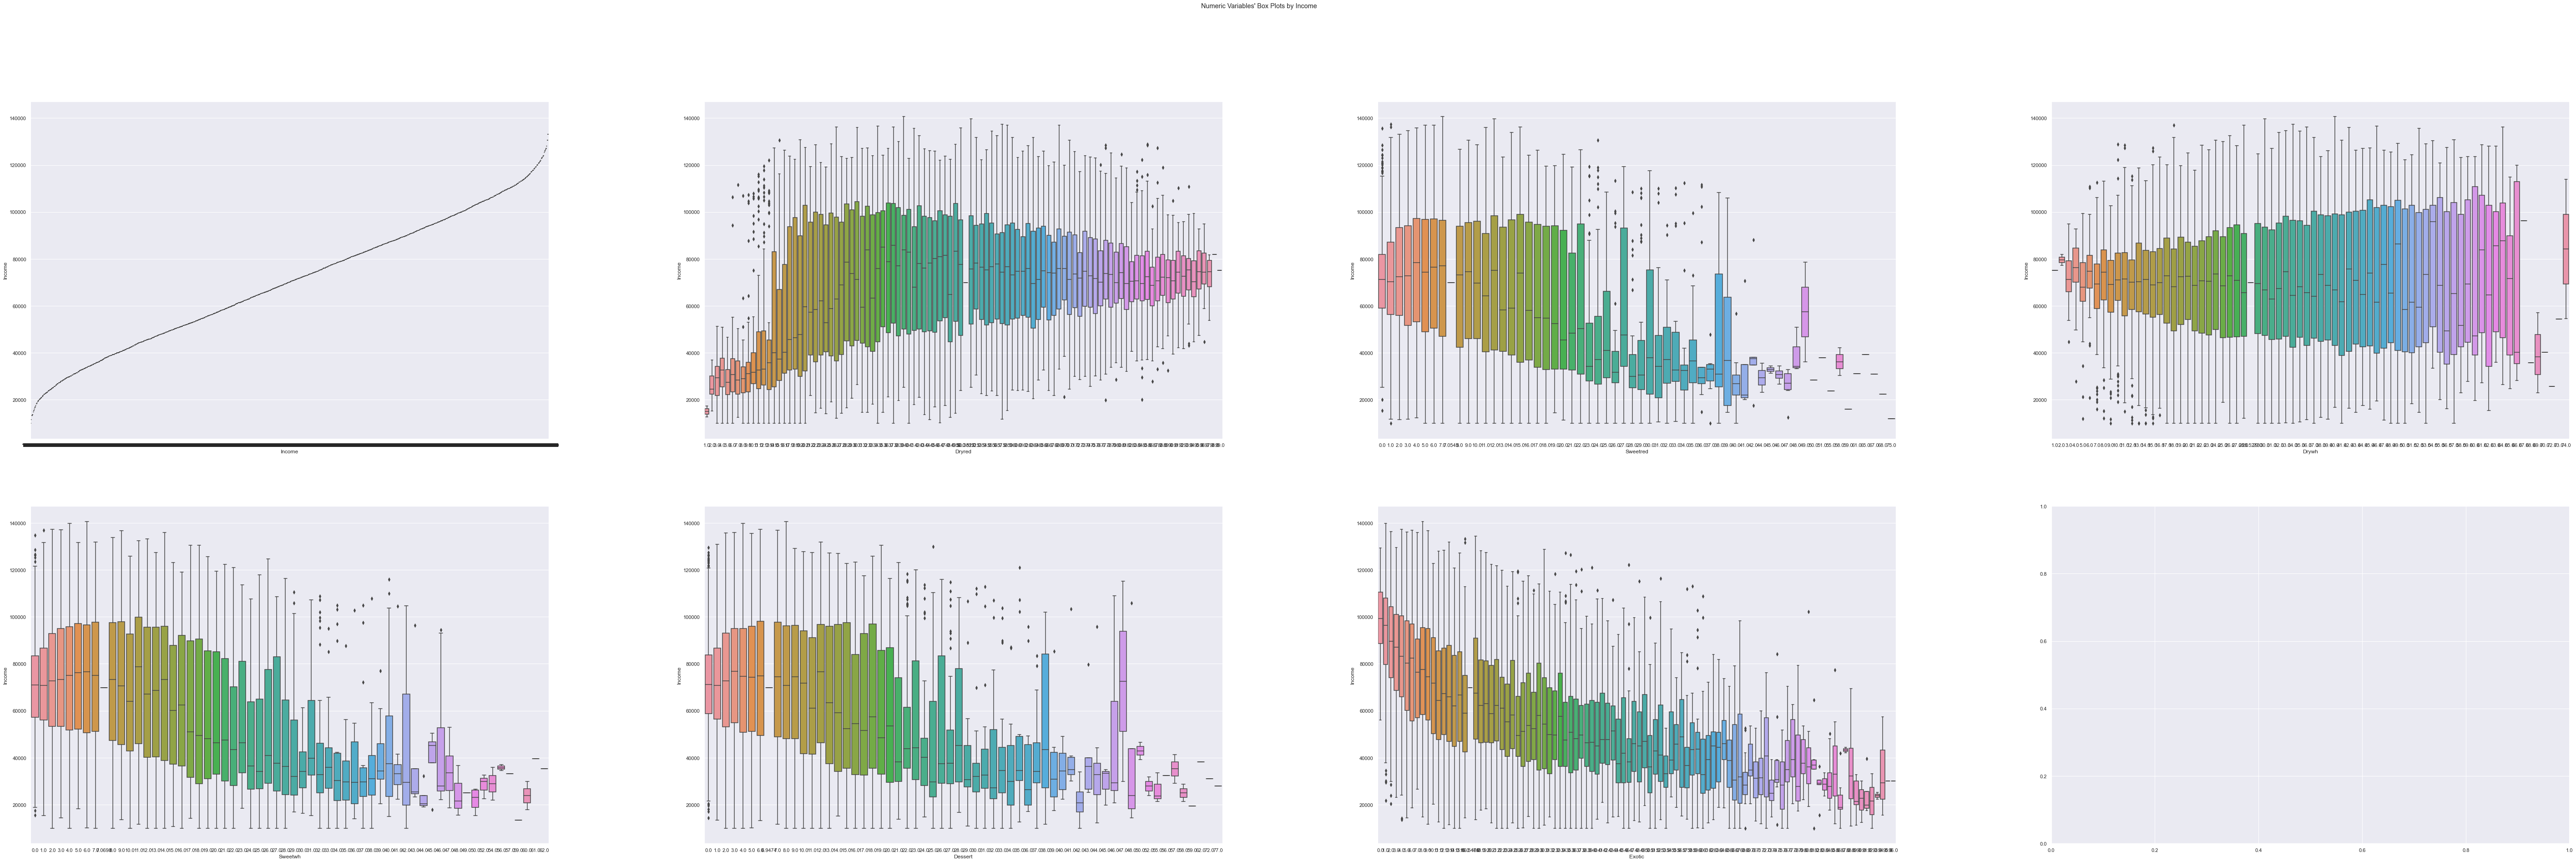

In [52]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(100,30))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], y=df['Income'], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Variables' Box Plots by Income"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)

plt.show()

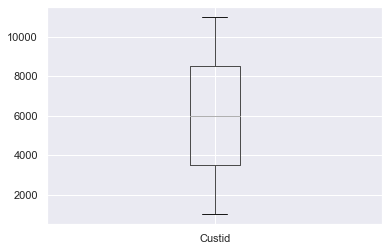

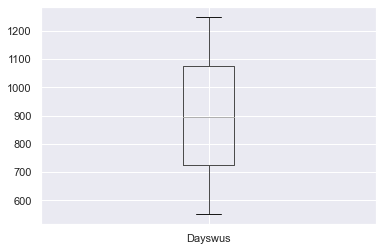

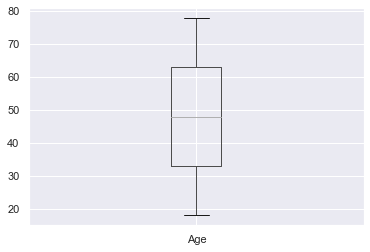

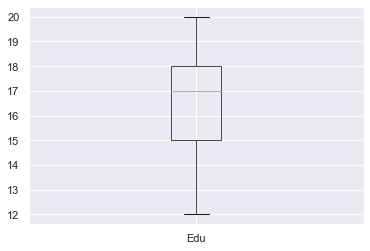

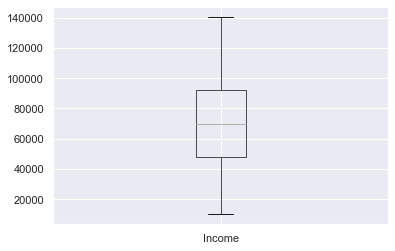

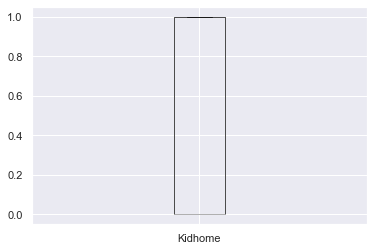

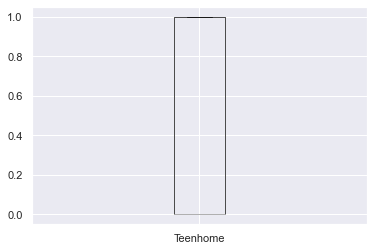

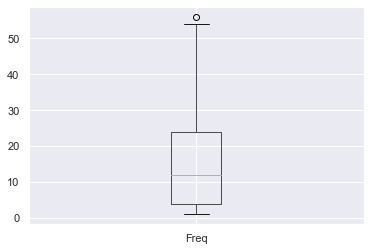

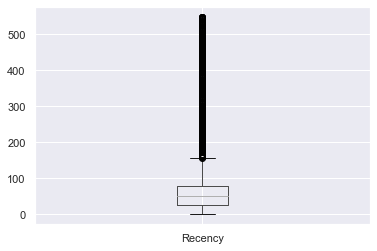

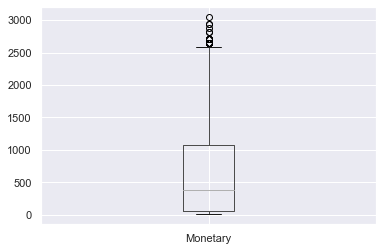

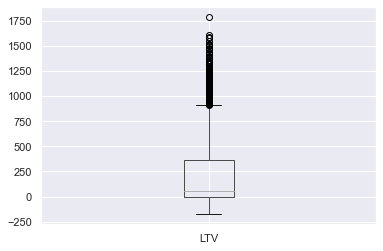

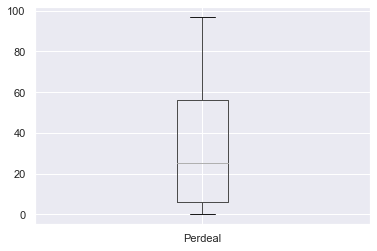

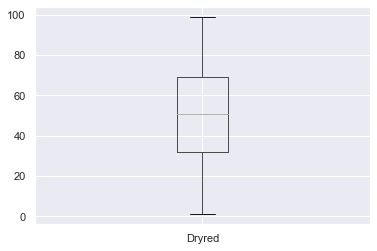

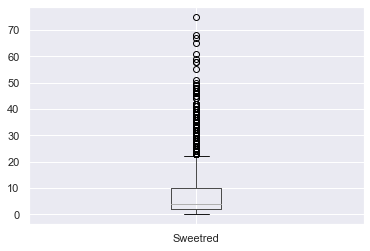

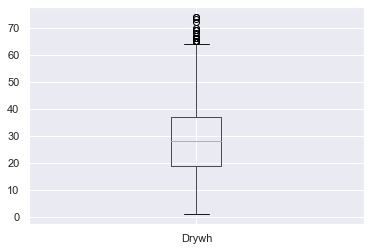

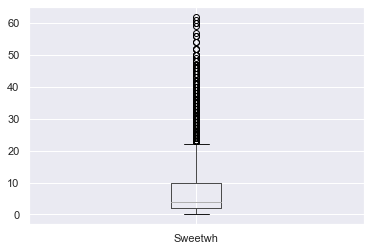

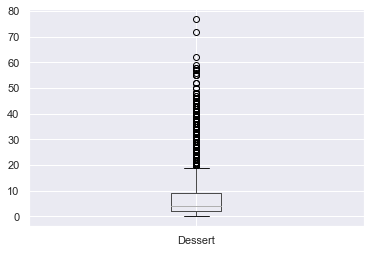

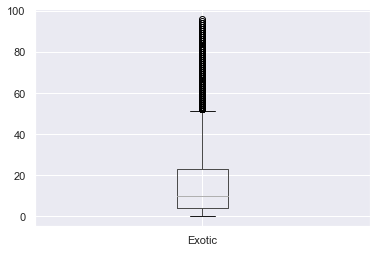

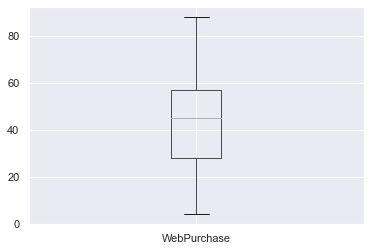

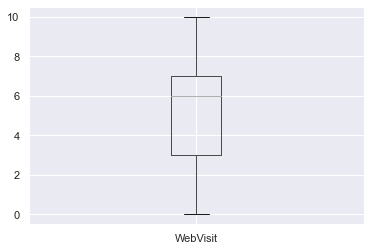

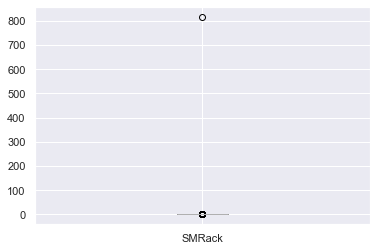

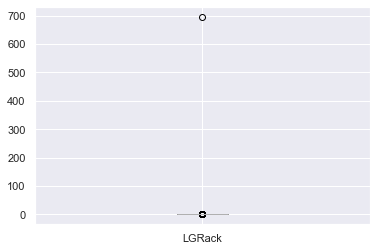

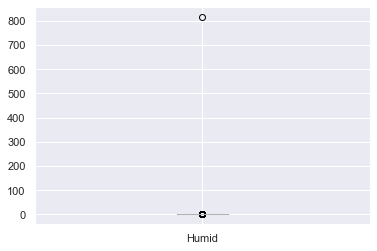

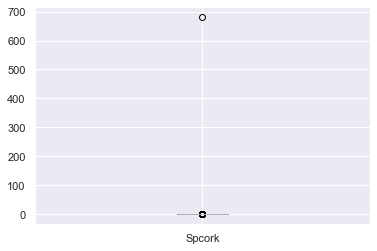

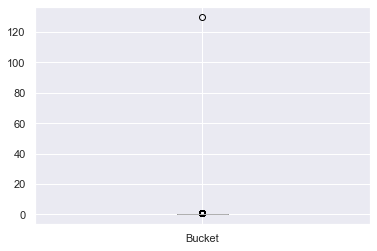

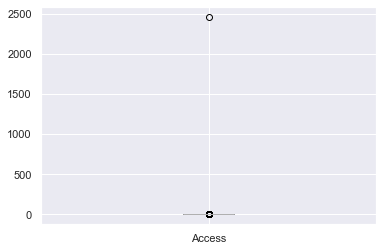

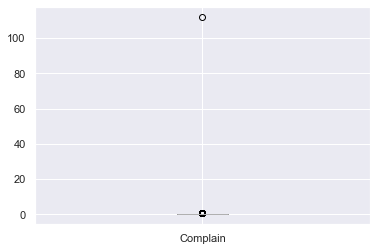

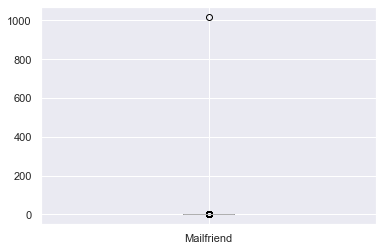

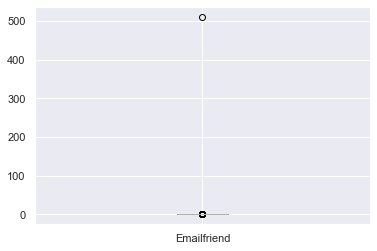

In [65]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

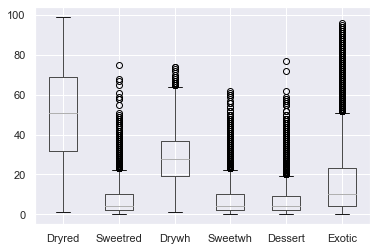

In [68]:
df[['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic']].boxplot()